In [25]:
import numpy as np
import pandas as pd
import opendatasets as od

In [5]:
od.download('https://www.kaggle.com/datasets/gowrishankarp/newspaper-text-summarization-cnn-dailymail')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: elshangadimov
Your Kaggle Key: ··········


100%|██████████| 503M/503M [00:13<00:00, 39.7MB/s]


In [26]:
# For local
# train = pd.read_csv('../cnn_dailymail/train.csv')
# test = pd.read_csv('../cnn_dailymail/test.csv')
# validation = pd.read_csv('../cnn_dailymail/validation.csv')

# For Colab
train = pd.read_csv('/content/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/train.csv')
test = pd.read_csv('/content/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/test.csv')
validation = pd.read_csv('/content/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/validation.csv')

In [27]:
train.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [28]:
print(train.shape)
print(test.shape)
print(validation.shape)

(287113, 3)
(11490, 3)
(13368, 3)


In [9]:
def print_row(n: int):
    print(train.iloc[n]['article'])
    print('\n')
    print(train.iloc[n]['highlights'])
print_row(1)

(CNN) -- Ralph Mata was an internal affairs lieutenant for the Miami-Dade Police Department, working in the division that investigates allegations of wrongdoing by cops. Outside the office, authorities allege that the 45-year-old longtime officer worked with a drug trafficking organization to help plan a murder plot and get guns. A criminal complaint unsealed in U.S. District Court in New Jersey Tuesday accuses Mata, also known as "The Milk Man," of using his role as a police officer to help the drug trafficking organization in exchange for money and gifts, including a Rolex watch. In one instance, the complaint alleges, Mata arranged to pay two assassins to kill rival drug dealers. The killers would pose as cops, pulling over their targets before shooting them, according to the complaint. "Ultimately, the (organization) decided not to move forward with the murder plot, but Mata still received a payment for setting up the meetings," federal prosecutors said in a statement. The complain

In [10]:
train['words_in_highlights'] = train['highlights'].apply(lambda x: len(x.split()))
train['words_in_article'] = train['article'].apply(lambda x: len(x.split()))

In [11]:
import matplotlib.pyplot as plt

In [12]:
train.head()

,id,article,highlights,words_in_highlights,words_in_article
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",37,198
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,38,392
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",69,808
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...,53,531
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...,67,580


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40e5bd3250>,
      dtype=object)

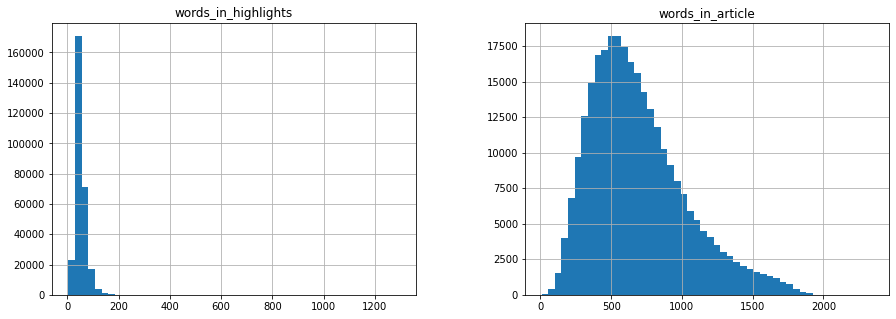

In [13]:
train[['words_in_highlights', 'words_in_article']].hist(bins=50, figsize=(15, 5))

In [30]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Let's get a list of stop words from the NLTK library
stop = stopwords.words('english')
# These words are important for our problem. We don't want to remove them.
excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]
# New stop word list
stop_words = [word for word in stop if word not in excluding]
snow = SnowballStemmer('english')
def text_cleansing(sent): 
    
    # Check if the sentence is a missing value
    if isinstance(sent, str) == False:
        sent = ""
    filtered_sentence=[]
    sent = sent.lower() # Lowercase 
    sent = sent.strip() # Remove leading/trailing whitespace
    sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
    sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
    for w in word_tokenize(sent):
        # We are applying some custom filtering here, feel free to try different things
        # Check if it is not numeric and its length>2 and not in stop words
        if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):  
            # Stem and add to filtered list
            filtered_sentence.append(snow.stem(w))
    final_string = " ".join(filtered_sentence) #final string of cleaned words
        
    return final_string
train['clean_highlights'] = train['highlights'].apply(lambda x: text_cleansing(x))
train.head(10)

In [34]:
train.tail()

,id,article,highlights,clean_highlights
287108,fffdfb56fdf1a12d364562cc2b9b1d4de7481dee,By . James Rush . Former first daughter Chelse...,Chelsea Clinton said question of running for o...,chelsea clinton said question run offic longer...
287109,fffeecb8690b85de8c3faed80adbc7a978f9ae2a,An apologetic Vanilla Ice has given his first ...,"Vanilla Ice, 47 - real name Robert Van Winkle ...",vanilla ice real name robert van winkl arrest ...
287110,ffff5231e4c71544bc6c97015cdb16c60e42b3f4,America's most lethal sniper claimed he wished...,America's most lethal sniper made comment in i...,america lethal sniper made comment interview t...
287111,ffff924b14a8d82058b6c1c5368ff1113c1632af,"By . Sara Malm . PUBLISHED: . 12:19 EST, 8 Mar...",A swarm of more than one million has crossed b...,swarm one million cross border egypt israel lo...
287112,ffffd563a96104f5cf4493cfa701a65f31b06abf,(CNN)Former Florida Gov. Jeb Bush has decided ...,Other 2016 hopefuls maintain that Bush's annou...,hope maintain bush announc would n't prevent r...


In [ ]:
train['clean_article'] = train['article'].apply(lambda x: text_cleansing(x))
train.head(10)

In [40]:
train.drop(['article', 'highlights'], axis=1, inplace=True)

In [47]:
train.to_csv('/content/train_clean.csv')

In [50]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [51]:
!cp /content/train_clean.csv "/drive/MyDrive/DS Lab"

In [44]:
from google.colab import files
files.download("/content/train_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
test['clean_article'] = test['article'].apply(lambda x: text_cleansing(x))
test['clean_highlights'] = test['highlights'].apply(lambda x: text_cleansing(x))

In [54]:
test.drop(['article', 'highlights'], axis=1, inplace=True)
test.to_csv('/content/test_clean.csv')

In [55]:
!cp /content/test_clean.csv "/drive/MyDrive/DS Lab"

In [56]:
validation['clean_article'] = validation['article'].apply(lambda x: text_cleansing(x))
validation['clean_highlights'] = validation['highlights'].apply(lambda x: text_cleansing(x))

In [57]:
validation.drop(['article', 'highlights'], axis=1, inplace=True)
validation.to_csv('/content/validation_clean.csv')

In [59]:
!cp /content/validation_clean.csv "/drive/MyDrive/DS Lab"